<a href="https://colab.research.google.com/github/desbaa32/Master2BD_tp_pro/blob/master/TP5_Normalisation_Batch_et_Optimisation_Hyperparam%C3%A8tres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TP - Normalisation du Batch et Optimisation des Hyperparamètres**

### **EXERCICE 1:** *Normalisation du batch*

In [10]:
import numpy as np
# Chargement des données depuis les fichiers .npy
print("Chargement des données...")
X_train = np.load('/content/X_train_digits.npy')
X_test = np.load('/content/X_test_digits.npy')
y_train = np.load('/content/y_train_digits.npy')
y_test = np.load('/content/y_test_digits.npy')

print("Taille : \n")
print(f"données d'apprentissage: {X_train.shape}")
print(f"données de test: {X_test.shape}")

Chargement des données...
Taille : 

données d'apprentissage: (1257, 64)
données de test: (540, 64)


In [11]:

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.optimizers import SGD
from keras.initializers import RandomNormal

print("\n_ 1. Construction de norm_model")

# 1. BatchNormalization

# 2 et 3. Construction du modèle norm_model avec normalisation du batch
norm_model = Sequential([
    Dense(50, activation='relu', kernel_initializer=RandomNormal(), input_shape=(64,)),
    BatchNormalization(),
    Dense(50, activation='relu', kernel_initializer=RandomNormal()),
    BatchNormalization(),
    Dense(50, activation='relu', kernel_initializer=RandomNormal()),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

# Compilation du modèle
norm_model.compile(optimizer=SGD(),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

print("\nArchitecture de norm_model:")
norm_model.summary()


_ 1. Construction de norm_model


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Architecture de norm_model:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 50)             │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,460 (36.95 KB)

 Trainable params: 9,160 (35.78 KB)

 Non-trainable params: 300 (1.17 KB)

In [12]:
print("\n 2. _Effet de la couche normalisation de batch")

# 1. Création du modèle standard_model
standard_model = Sequential([
    Dense(50, activation='relu', kernel_initializer=RandomNormal(), input_shape=(64,)),
    Dense(50, activation='relu', kernel_initializer=RandomNormal()),
    Dense(50, activation='relu', kernel_initializer=RandomNormal()),
    Dense(10, activation='softmax')
])

# Compilation du modèle standard
standard_model.compile(optimizer=SGD(),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

print("\nArchitecture de standard_model:")
standard_model.summary()

# 2. Entraînement de standard_model
print("\nEntraînement de standard_model...")
hist_stdr = standard_model.fit(X_train, y_train,
                                epochs=10,
                                validation_data=(X_test, y_test),
                                verbose=1)

# 3. Entraînement de norm_model
print("\nEntraînement de norm_model...")
hist_norm = norm_model.fit(X_train, y_train,
                           epochs=10,
                           validation_data=(X_test, y_test),
                           verbose=1)


 2. _Effet de la couche normalisation de batch

Architecture de standard_model:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 50)             │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,860 (34.61 KB)

 Trainable params: 8,860 (34.61 KB)

 Non-trainable params: 0 (0.00 B)


Entraînement de standard_model...
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1288 - loss: 2.2848 - val_accuracy: 0.3241 - val_loss: 2.1886
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3656 - loss: 2.1357 - val_accuracy: 0.4463 - val_loss: 1.9501
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4676 - loss: 1.8194 - val_accuracy: 0.6222 - val_loss: 1.4902
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6911 - loss: 1.3292 - val_accuracy: 0.7278 - val_loss: 1.0289
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7512 - loss: 0.9122 - val_accuracy: 0.7981 - val_loss: 0.6783
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8489 - loss: 0.6248 - val_accuracy: 0.7759 - val_loss: 0.6301
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8761 - loss: 0.4656 - val_accuracy: 0.8148 - val_loss: 0.5094
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8830 - loss: 0.387


 -__  Comparaison des performances __-


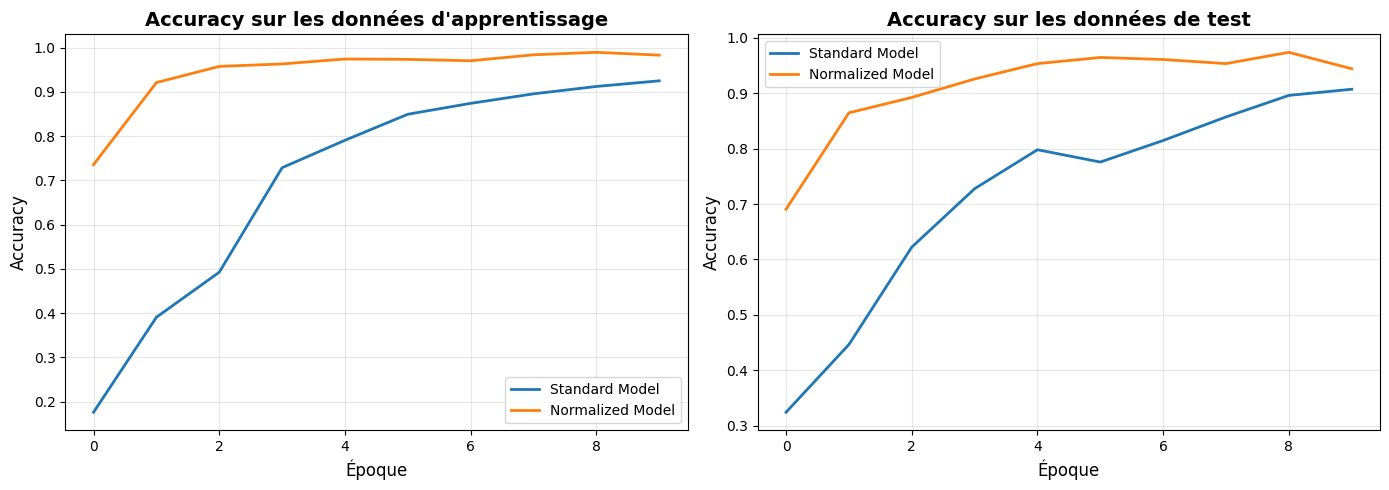


 -__ Résultats __-
Standard Model - Accuracy finale (train): 0.9252
Standard Model - Accuracy finale (test): 0.9074
Normalized Model - Accuracy finale (train): 0.9833
Normalized Model - Accuracy finale (test): 0.9444


In [13]:
import matplotlib.pyplot as plt
# 4. Définition de la fonction compare_histories_acc
def compare_histories_acc(hist_stdr, hist_norm):
    plt.figure(figsize=(14, 5))

    # Graph 1: Accuracy apprentissage
    plt.subplot(1, 2, 1)
    plt.plot(hist_stdr.history['accuracy'], label='Standard Model', linewidth=2)
    plt.plot(hist_norm.history['accuracy'], label='Normalized Model', linewidth=2)
    plt.title('Accuracy sur les données d\'apprentissage', fontsize=14, fontweight='bold')
    plt.xlabel('Époque', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)

    # Graph 2: Accuracy  test
    plt.subplot(1, 2, 2)
    plt.plot(hist_stdr.history['val_accuracy'], label='Standard Model', linewidth=2)
    plt.plot(hist_norm.history['val_accuracy'], label='Normalized Model', linewidth=2)
    plt.title('Accuracy sur les données de test', fontsize=14, fontweight='bold')
    plt.xlabel('Époque', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Affichage des résultats finaux
    print("\n -__ Résultats __-")
    print(f"Standard Model - Accuracy finale (train): {hist_stdr.history['accuracy'][-1]:.4f}")
    print(f"Standard Model - Accuracy finale (test): {hist_stdr.history['val_accuracy'][-1]:.4f}")
    print(f"Normalized Model - Accuracy finale (train): {hist_norm.history['accuracy'][-1]:.4f}")
    print(f"Normalized Model - Accuracy finale (test): {hist_norm.history['val_accuracy'][-1]:.4f}")

# Appel de la fonction de comparaison
print("\n -__  Comparaison des performances __-")
compare_histories_acc(hist_stdr, hist_norm)

### **EXERCICE 2:** *Optimisation des Hyperparamètres*

In [14]:
# Chargement des données
print("Chargement des données...")
X_disease = np.load('/content/X_disease.npy')
y_disease = np.load('/content/y_disease.npy')

print("Taille : \n")
print(f"X_disease: {X_disease.shape}")
print(f"y_disease: {y_disease.shape}")

Chargement des données...
Taille : 

X_disease: (569, 30)
y_disease: (569,)


In [15]:

from keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier


print("\n \t 1. Création du modèle paramétrique ")

# 1. Définition de la fonction create_model
def create_model(learning_rate=0.01, activation_func='relu'):

    # 2. Création du modèle séquentiel
    model = Sequential([
        Dense(128, activation=activation_func, input_shape=(30,)),
        Dense(256, activation=activation_func),
        Dense(1, activation='sigmoid')
    ])

    # Compilation du modèle pour classification binaire
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


 	 1. Création du modèle paramétrique 


In [16]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
print("\n \t 2. Optimisation des paramètres ")

# 1. Import de KerasClassifier et Déclaration de KerasClassifier
skmodel = KerasClassifier(
    model=create_model,
    verbose=0
)


# 3. Définition du dictionnaire des hyperparamètres
param_dist = {
    'model__activation_func': ['relu', 'tanh'],
    'batch_size': [32, 128, 256],
    'epochs': [50, 100, 200],
    'model__learning_rate': [0.1, 0.01, 0.001]
}

print("\nHyperparamètres à tester:")
for key, values in param_dist.items():
    print(f"  {key}: {values}")

# 4. Création de l'objet RandomizedSearchCV
print("\n Création de RandomizedSearchCV...")
random_search = RandomizedSearchCV(
    estimator=skmodel,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# 5. Entraînement du modèle avec RandomizedSearchCV
print("\n Entraînement en cours")
random_search.fit(X_disease, y_disease)

# 6. Affichage des hyperparamètres optimaux
print("\n" + "="*60)
print("HYPERPARAMÈTRES OPTIMAUX")
best_params = random_search.best_params_
for param, value in best_params.items():
    print(f"  {param}: {value}")
print(f"\nMeilleur score: {random_search.best_score_:.4f}")


 	 2. Optimisation des paramètres 

Hyperparamètres à tester:
  model__activation_func: ['relu', 'tanh']
  batch_size: [32, 128, 256]
  epochs: [50, 100, 200]
  model__learning_rate: [0.1, 0.01, 0.001]

 Création de RandomizedSearchCV...

 Entraînement en cours
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



HYPERPARAMÈTRES OPTIMAUX
  model__learning_rate: 0.001
  model__activation_func: relu
  epochs: 100
  batch_size: 256

Meilleur score: 0.9754


In [17]:
print("\n \t 3. Validation croisée ")

# Extraction des hyperparamètres optimaux
optimal_activation = best_params.get('model__activation_func', 'relu')
optimal_lr = best_params.get('model__learning_rate', 0.01)
optimal_batch_size = best_params.get('batch_size', 32)
optimal_epochs = best_params.get('epochs', 50)

# 1. Création d'un nouvel objet KerasClassifier avec les paramètres optimaux
optimized_model = KerasClassifier(
    model=create_model,
    activation_func=optimal_activation,
    learning_rate=optimal_lr,
    batch_size=optimal_batch_size,
    epochs=optimal_epochs,
    verbose=0
)

print("Modèle optimisé créé avec les meilleurs hyperparamètres")

# 2. Validation croisée avec cross_val_score
print("\n Validation croisée en cours (5 folds)...")
cv_scores = cross_val_score(
    estimator=optimized_model,
    X=X_disease,
    y=y_disease,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# 3. Affichage des résultats de validation croisée
print(" \t \t RÉSULTATS DE LA VALIDATION CROISÉE")
print(f"\n Scores des 5 folds: {cv_scores}")
print(f"\nAccuracy moyenne: {cv_scores.mean():.4f}")
print(f"Écart type: {cv_scores.std():.4f}")
print(f"Intervalle de confiance: [{cv_scores.mean() - 2*cv_scores.std():.4f}, "
      f"{cv_scores.mean() + 2*cv_scores.std():.4f}]")


 	 3. Validation croisée 
Modèle optimisé créé avec les meilleurs hyperparamètres

 Validation croisée en cours (5 folds)...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


 	 	 RÉSULTATS DE LA VALIDATION CROISÉE

 Scores des 5 folds: [0.96491228 0.94736842 0.97368421 1.         0.98230088]

Accuracy moyenne: 0.9737
Écart type: 0.0175
Intervalle de confiance: [0.9386, 1.0087]


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   34.0s finished
